# this code tries to figure out the structure from the .h5 file

In [19]:
import h5py

def print_names(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(name)

# Open the H5 file for reading
with h5py.File('/home/hezo/stroke_zurich/data/dicom_2d_192x192x3_clean_interpolated_18_02_2021_preprocessed2.h5', 'r') as file:
    # Walk through the file and print dataset names
    file.visititems(print_names)


X
Y_img
Y_pat
pat


In [20]:
import h5py

def explore_h5py_structure(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"Dataset: {name}")
        print(f" - Shape: {obj.shape}")
        print(f" - Datatype: {obj.dtype}")
    elif isinstance(obj, h5py.Group):
        print(f"Group: {name}")
    else:
        print(f"Unknown: {name}")

# Open the H5 file for reading
with h5py.File('/home/hezo/stroke_zurich/data/dicom_2d_192x192x3_clean_interpolated_18_02_2021_preprocessed2.h5', 'r') as file:
    # Walk through the file and print details about its structure
    file.visititems(explore_h5py_structure)


Dataset: X
 - Shape: (439, 128, 128, 28)
 - Datatype: float64
Dataset: Y_img
 - Shape: (439, 28)
 - Datatype: int64
Dataset: Y_pat
 - Shape: (439,)
 - Datatype: int64
Dataset: pat
 - Shape: (439,)
 - Datatype: int64


Now i try to extract just the first entry in the h5 file and save it as a nii file

In [48]:
import h5py
import nibabel as nib
import numpy as np

# Specify your desired output directory path here
output_directory = '/home/saxermi1/test_data/'

# Ensure your file name is as desired
output_file_name = 'test_volume.nii'

# Combine the directory path and file name to create a full output path
output_file_path = output_directory + output_file_name

# Open the H5 file for reading
with h5py.File('/home/hezo/stroke_zurich/data/dicom_2d_192x192x3_clean_interpolated_18_02_2021_preprocessed2.h5', 'r') as file:
    # Extract the first volume from the dataset "X"
    first_volume = file['X'][0]  #  extracts the first 3D volume (128x128x28) (adjust number to extract different one)

    # Assuming an identity matrix for the affine transformation
    affine_matrix = np.eye(4)
    
    # Create a NIfTI image object from the extracted volume
    nifti_image = nib.Nifti1Image(first_volume, affine=affine_matrix)

    # Save the NIfTI image to the specified file path
    nib.save(nifti_image, output_file_path)
    print("finished succsessfully under")
    print(output_file_path)

finished succsessfully under
/home/saxermi1/test_data/test_volume.nii


In [42]:
from NeuroImageProcessor import  NeuroImageProcessor


processor = NeuroImageProcessor()

In [47]:
#this code trys if the implementation as a class was completed succsefully

# Specify your H5 file path, output directory, and output file name
h5_file_path = '/home/hezo/stroke_zurich/data/dicom_2d_192x192x3_clean_interpolated_18_02_2021_preprocessed2.h5'
output_directory = '/home/saxermi1/test_data/'
output_file_name = 'test_volume.nii'

# Optionally, specify the volume index you want to extract
volume_index = 0  # Adjust this to extract a different volume

processor.h5_to_nifti(h5_file_path, output_directory, output_file_name, volume_index)


NameError: name 'h5py' is not defined

# now we try to visualize the nii file to make sure that the transformation was succsessfull

In [40]:
from NeuroImageProcessor import  NeuroImageProcessor


processor = NeuroImageProcessor()

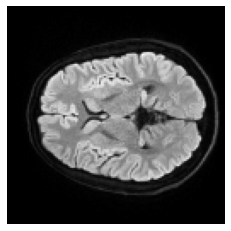

In [41]:
nifti_path = "/home/saxermi1/test_data/test_volume.nii"
processor.visualize_middle_slice(nifti_path)


 code seems to work. nice.